# DSP - Amplitude Envelope, RMS-energy
Rajesh Siraskar | 30-Apr-2021

#### Basics
- DSP/Audio Features for ML: [Valerio Velardo](https://www.youtube.com/watch?v=rlypsap6Wow&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=8)
- [DSP: Basics](https://support.ircam.fr/docs/AudioSculpt/3.0/co/Sampling.html) - Aliasing, Nyquist Freq.,lowest detectable frequency
- A signal sampled with a 32 KHz SR, any freq. components > 16 KHz (N.F.), we get an aliasing
- Nyquist Frequency and the relation between sampling-rate and max. frequency
    - $F_{max} = Sampling Rate/2$
    - $F_{max}$ is called _Nyquist Frequency_

#### Time Domain Features
- Amplitude Envelope
- RMS Energy

In [2]:
import warnings
import os
from pathlib import Path
warnings.filterwarnings("ignore")

In [3]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

PATH = 'd:/ML/DSP/audio_files/' 

In [4]:
# Analyze personal .wav file
afile  = os.path.join('..', PATH, 'HelloAudioWorld_2.wav')
m1file = os.path.join('..', PATH, 'badass.wav') # Beats
m2file = os.path.join('..', PATH, 'Canary.wav')  # Canary
m3file = os.path.join('..', PATH, 'MeadowLark.wav')  # MeadowLark

#m2file = os.path.join('..', PATH, 'happyrock.wav')  # Electronica rock      
#m3file = os.path.join('..', PATH, 'jazzyfrenchy.wav')  # Clapping/feet-tapping
#m4file = os.path.join('..', PATH, 'creativeminds.wav')  # Slow start, strings

In [5]:
ipd.Audio(m2file)

In [6]:
# Analyze audio file
waveform1, sample_rate  = librosa.load(afile)
waveform2, sample_rate2 = librosa.load(m1file)
waveform3, sample_rate3 = librosa.load(m2file)

In [7]:
# Sample rate
print('Sampling rate:\t\t', sample_rate)
duration = 1/sample_rate
print('Duration of ONE sample:\t %0.6f seconds' % duration)
print('Duration of full audio:\t %4.2f seconds' % (duration*len(waveform1)))


# Sample rate
print('Sampling rate:\t\t', sample_rate3)
duration = 1/sample_rate3
print('Duration of ONE sample:\t %0.6f seconds' % duration)
print('Duration of full audio:\t %4.2f seconds' % (duration*len(waveform3)))


Sampling rate:		 22050
Duration of ONE sample:	 0.000045 seconds
Duration of full audio:	 12.12 seconds
Sampling rate:		 22050
Duration of ONE sample:	 0.000045 seconds
Duration of full audio:	 4.93 seconds


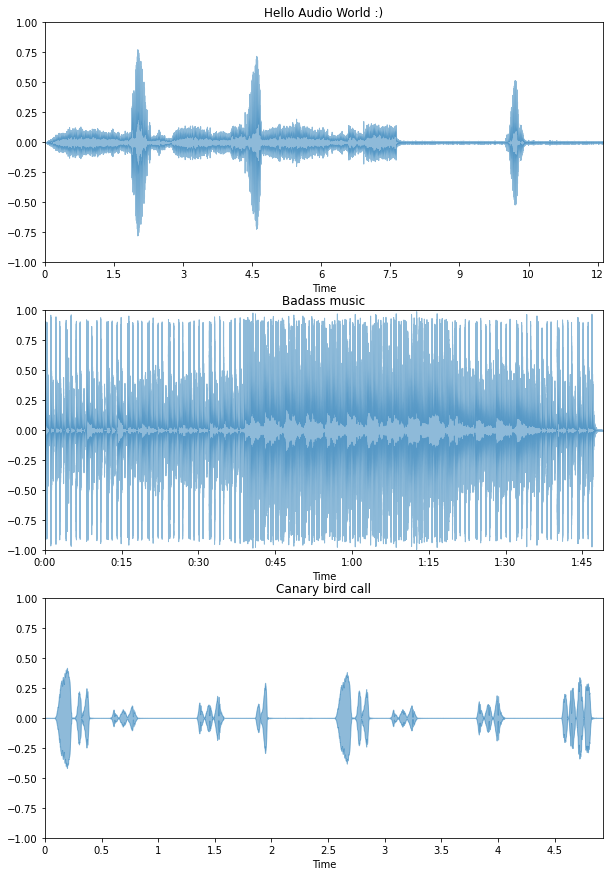

In [8]:
# Visualize the 3 waveforms
plt.figure(figsize=(10, 15)) # 10 wd. x 15 ht

plt.subplot(3, 1, 1) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform1, alpha=0.5)
plt.title('Hello Audio World :)')
plt.ylim((-1,1))

plt.subplot(3, 1, 2) # 2nd plot
librosa.display.waveplot(waveform2, alpha=0.5)
plt.title('Badass music')
plt.ylim((-1,1))

plt.subplot(3, 1, 3) # 3rd plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.title('Canary bird call')
plt.ylim((-1,1))

plt.show()

### Amplitude Envelope

In [9]:
# AE (list comprehension bashttp://localhost:8888/notebooks/audio_dl/audio_Fundamental_DSP.ipynb#Amplitude-Envelopeed)
def amplitude_envelope (signal, frame_size, hop_length):    
    return np.array([max(signal[t:t+frame_size]) for t in range (0, signal.size, hop_length)])

# Normal for loop base
# def amplitude_envelope (signal, frame_size, hop_length):
#     # AE = amplitude_envelope
#     AE = [] 
    
#     for t in range (0, len(signal), hop_length):
#         current_frame_AE = max(signal[t: t+frame_size])
#         AE.append(current_frame_AE)
        
#     return np.array(AE)

In [10]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

AE_waveform1 = amplitude_envelope(waveform1, FRAME_SIZE, HOP_LENGHT)
AE_waveform2 = amplitude_envelope(waveform2, FRAME_SIZE, HOP_LENGHT)
AE_waveform3 = amplitude_envelope(waveform3, FRAME_SIZE, HOP_LENGHT)

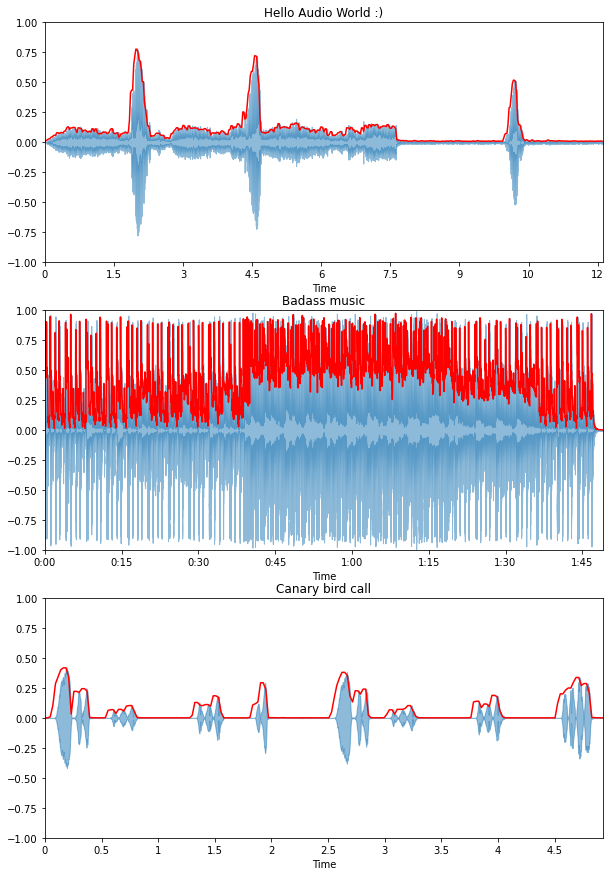

In [11]:
# Visualize the 3 waveforms
plt.figure(figsize=(10, 15)) # 10 wd. x 15 ht

# Compute the time length for AEs
frames = range(0, AE_waveform1.size)
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 1) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform1, alpha=0.5)
plt.plot(T, AE_waveform1, color='r')
plt.title('Hello Audio World :)')
plt.ylim((-1,1))

# Compute the time length for AEs
frames = range(0, AE_waveform2.size)
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 2) # 2nd plot
librosa.display.waveplot(waveform2, alpha=0.5)
plt.plot(T, AE_waveform2, color='r')
plt.title('Badass music')
plt.ylim((-1,1))

# Compute the time length for AEs
frames = range(0, AE_waveform3.size)
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 3) # 3rd plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, AE_waveform3, color='r')
plt.title('Canary bird call')
plt.ylim((-1,1))

plt.show()

### Impact of Frame and Hop-size on computing the envelope

Notice the lag in Canary bird AE for frame-size 1024 and hop 512 

(-1.0, 1.0)

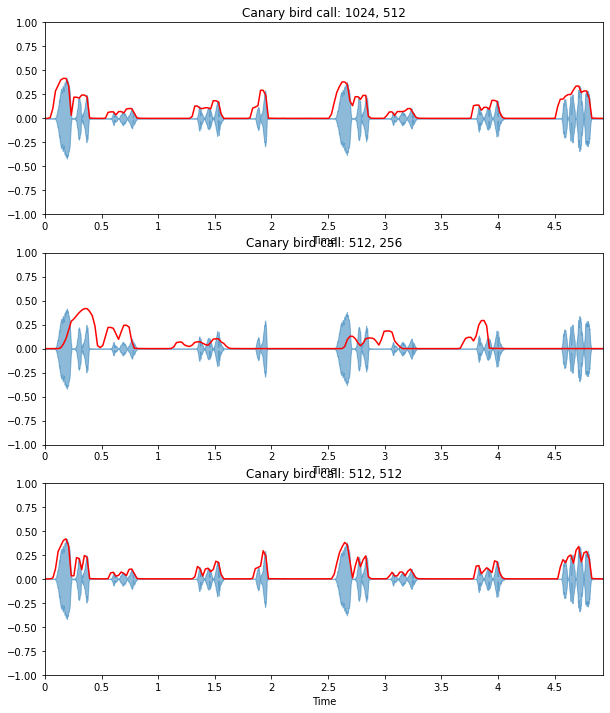

In [12]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

plt.figure(figsize=(10, 12))

# FRAME_SIZE = 1024, HOP_LENGHT = 512
AE_waveform3 = amplitude_envelope(waveform3, 1024, 512)
frames = range(0, AE_waveform3.size)
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 1) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, AE_waveform3, color='r')
plt.title('Canary bird call: 1024, 512')
plt.ylim((-1,1))

# FRAME_SIZE = 512, HOP_LENGHT = 256
AE_waveform3 = amplitude_envelope(waveform3, 512, 256)
frames = range(0, AE_waveform3.size)
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 2) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, AE_waveform3, color='r')
plt.title('Canary bird call: 512, 256')
plt.ylim((-1,1))

# FRAME_SIZE = 256, HOP_LENGHT = 64
AE_waveform3 = amplitude_envelope(waveform3, 512, 512)
frames = range(0, AE_waveform3.size)
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 3) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, AE_waveform3, color='r')
plt.title('Canary bird call: 512, 512')
plt.ylim((-1,1))

RMS Energy
==============================================

Note: librosa rms funciton returns shape of (xxx, 1) and need to take rms[0] to plot values

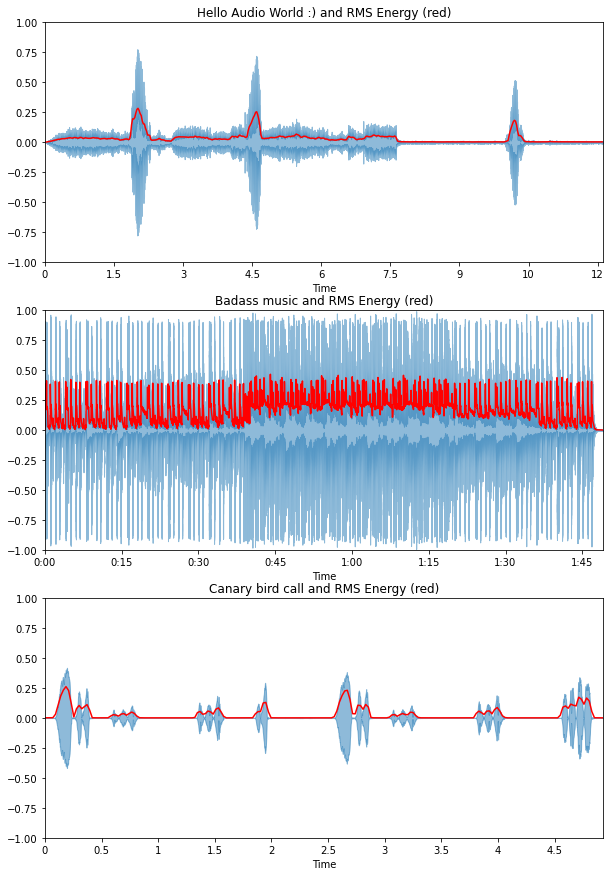

In [13]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

# Visualize the 3 waveforms
plt.figure(figsize=(10, 15)) # 10 wd. x 15 ht


# RMS energy for Waveform 1 
rms_waveform1 = librosa.feature.rms(waveform1, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
# Compute the time length for rms
frames = range(len(rms_waveform1))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 1) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform1, alpha=0.5)
plt.plot(T, rms_waveform1, color='r')
plt.title('Hello Audio World :) and RMS Energy (red)')
plt.ylim((-1,1))


# RMS energy for Waveform 2
rms_waveform2 = librosa.feature.rms(waveform2, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
# Compute the time length for AEs
frames = range(len(rms_waveform2))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 2) # 2nd plot
librosa.display.waveplot(waveform2, alpha=0.5)
plt.plot(T, rms_waveform2, color='r')
plt.title('Badass music and RMS Energy (red)')
plt.ylim((-1,1))

# RMS energy for Waveform 3
rms_waveform3 = librosa.feature.rms(waveform3, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
# Compute the time length for AEs
frames = range(len(rms_waveform3))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 3) # 3rd plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, rms_waveform3, color='r')
plt.title('Canary bird call and RMS Energy (red)')
plt.ylim((-1,1))

plt.show()

### RMSE function from scratch

In [14]:
def rms_energy(signal, frame_size, hop_length):
    rmse = []
    
    # For-loop version
    # for t in range(0, signal.size, hop_length):
    #    rmse.append(np.sqrt(np.mean(np.power(signal[t:t+frame_size],2))))
    
    # List comprehension version
    return np.array([np.sqrt(np.mean(np.power(signal[t:t+frame_size],2))) for t in range (0, signal.size, hop_length)])

(-1.0, 1.0)

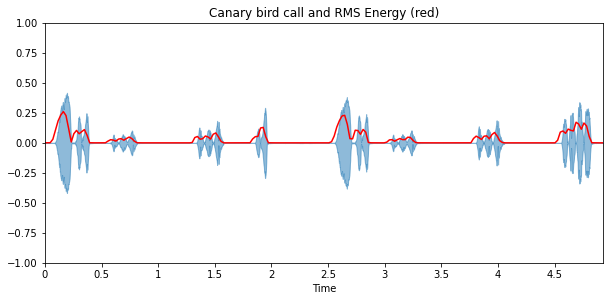

In [15]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

# Visualize the 3 waveforms
plt.figure(figsize=(10, 15)) # 10 wd. x 15 ht

rms_w3 = rms_energy(waveform3, frame_size=FRAME_SIZE, hop_length=HOP_LENGHT)

# RMS energy for Waveform 1 
# rms_waveform1 = librosa.feature.rms(waveform3, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]

# Compute the time length for rms
frames = range(len(rms_waveform3))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 1) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, rms_w3, color='r')
plt.title('Canary bird call and RMS Energy (red)')
plt.ylim((-1,1))

Zero Crossing Rate
================

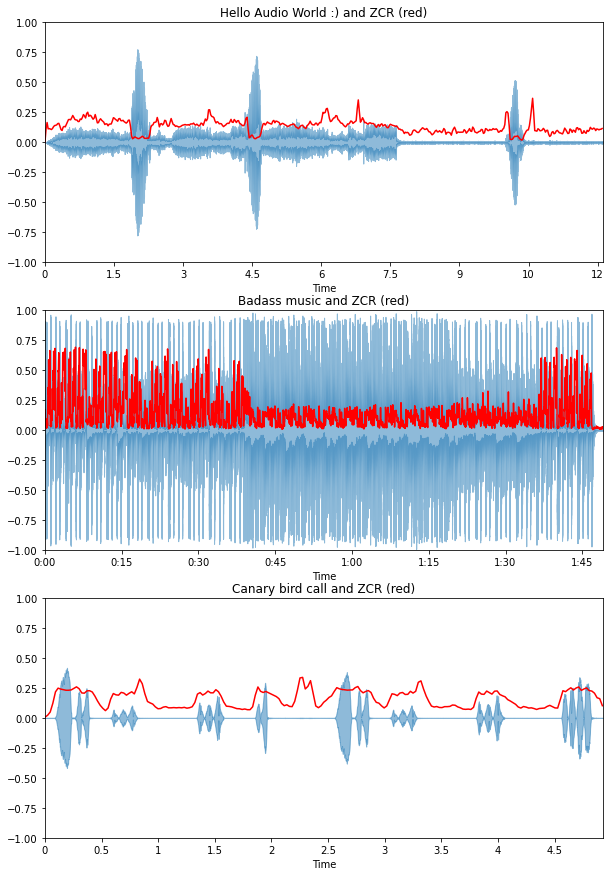

In [16]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

# Visualize the 3 waveforms
plt.figure(figsize=(10, 15)) # 10 wd. x 15 ht


# ZCR for Waveform 1 
zcr_waveform1 = librosa.feature.zero_crossing_rate(waveform1, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
# Compute the time length for rms
frames = range(len(zcr_waveform1))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 1) # 3 rows by 1 col, 1st plot
librosa.display.waveplot(waveform1, alpha=0.5)
plt.plot(T, zcr_waveform1, color='r')
plt.title('Hello Audio World :) and ZCR (red)')
plt.ylim((-1,1))


# ZCR for Waveform 2
zcr_waveform2 = librosa.feature.zero_crossing_rate(waveform2, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
# Compute the time length for AEs
frames = range(len(zcr_waveform2))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 2) # 2nd plot
librosa.display.waveplot(waveform2, alpha=0.5)
plt.plot(T, zcr_waveform2, color='r')
plt.title('Badass music and ZCR (red)')
plt.ylim((-1,1))

# ZCR for Waveform 3
zcr_waveform3 = librosa.feature.zero_crossing_rate(waveform3, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
# Compute the time length for AEs
frames = range(len(zcr_waveform3))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.subplot(3, 1, 3) # 3rd plot
librosa.display.waveplot(waveform3, alpha=0.5)
plt.plot(T, zcr_waveform3, color='r')
plt.title('Canary bird call and ZCR (red)')
plt.ylim((-1,1))

plt.show()

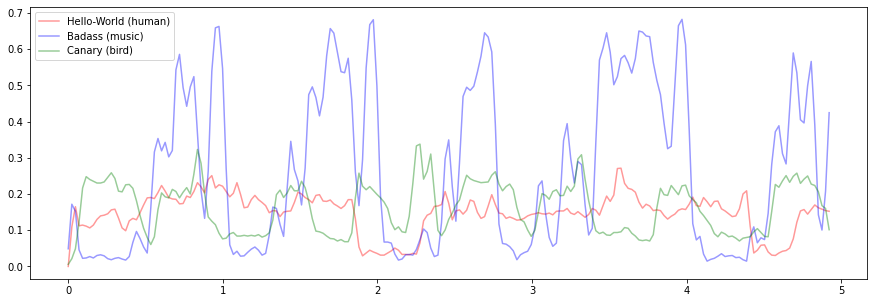

In [44]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

# ZCR for Waveforms
zcr_waveform1 = librosa.feature.zero_crossing_rate(waveform1, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
zcr_waveform2 = librosa.feature.zero_crossing_rate(waveform2, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]
zcr_waveform3 = librosa.feature.zero_crossing_rate(waveform3, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0]

# Restricting ONLY 213 frames as the bird-call .wav was only 213 frames long, so compare all in one plot, reduced others too.
zcr_waveform1 = zcr_waveform1[0:213] # Reduce to match bird-call waveform
zcr_waveform2 = zcr_waveform2[0:213] # Reduce to match bird-call waveform

# Visualize the 3 waveforms
plt.figure(figsize=(15, 5))

frames = range(len(zcr_waveform1))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.plot(T, zcr_waveform1, color='r', alpha=0.4)

frames = range(len(zcr_waveform2))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.plot(T, zcr_waveform2, color='b', alpha=0.4)

frames = range(len(zcr_waveform3))
T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
plt.plot(T, zcr_waveform3, color='g', alpha=0.4)


legend=["Hello-World (human)", "Badass (music)", "Canary (bird)"]
plt.legend(legend, loc ="upper left")